In [38]:
import numpy as np
import zipfile as zp
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# load output data, the first line are strings, should be loaded as field names. The rest are numbers.
# output_data = np.loadtxt('./2023-07-20T10-33-33.968372Z/Output-run1.csv',delimiter=';',dtype='str')
# output = np.genfromtxt('./2023-07-20T10-33-33.968372Z/Output-run1.csv',names=True,dtype=None,encoding=None,delimiter=';')

output = pd.read_csv('./2023-07-20T10-33-33.968372Z/Output-run1.csv',sep=';',skipinitialspace=True)
output.shape

(2001, 54)

In [39]:
output.columns

Index(['Model time', 'nNonBTLHomeless', 'nBTLHomeless', 'nHomeless',
       'nRenting', 'nNonOwner', 'nNonBTLOwnerOccupier', 'nBTLOwnerOccupier',
       'nOwnerOccupier', 'nActiveBTL', 'nBTL', 'nNonBTLBankrupt',
       'nBTLBankrupt', 'TotalPopulation', 'HousingStock', 'nEmptyHouses',
       'BTLStockFraction', 'Sale HPI', 'Sale AnnualHPA', 'Sale AvBidPrice',
       'Sale AvOfferPrice', 'Sale AvSalePrice', 'Sale AvMonthsOnMarket',
       'Sale nBuyers', 'Sale nBTLBuyers', 'Sale nSellers', 'Sale nNewSellers',
       'Sale nBTLSellers', 'Sale nSales',
       'Sale nNonBTLBidsAboveExpAvSalePrice',
       'Sale nBTLBidsAboveExpAvSalePrice', 'Sale nSalesToBTL',
       'Sale nSalesToFTB', 'Rental HPI', 'Rental AnnualHPA',
       'Rental AvBidPrice', 'Rental AvOfferPrice', 'Rental AvSalePrice',
       'Rental AvMonthsOnMarket', 'Rental nBuyers', 'Rental nSellers',
       'Rental nSales', 'Rental ExpAvFlowYield', 'nStockMortgages',
       'nNewFTBMortgages', 'nNewFTBMortgagesToBTL', 'nNewHMMor

In [43]:
output[:]['Sale HPI']

0       0.9943
1       0.9502
2       0.9793
3       0.9646
4       0.9720
         ...  
1996    0.6753
1997    0.6742
1998    0.6933
1999    0.6913
2000    0.6975
Name: Sale HPI, Length: 2001, dtype: float64

In [50]:
hpi=output[['Sale HPI']]
hpi

,Sale HPI
0,0.9943
1,0.9502
2,0.9793
3,0.9646
4,0.9720
...,...
1996,0.6753
1997,0.6742
1998,0.6933
1999,0.6913


<AxesSubplot:>

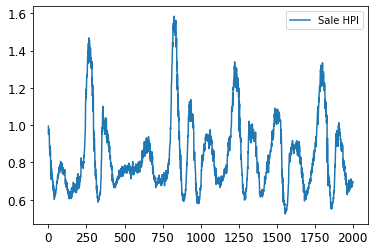

In [51]:
fig, ax = plt.subplots()
hpi.plot(ax=ax,fontsize=12)

In [59]:
from statsmodels.tsa.filters.hp_filter import hpfilter
cycle,trend = hpfilter(hpi, lamb=129600)
seg = output[['Sale HPI']]
seg['cycle']= cycle
seg['trend'] = trend
seg

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_27528/1336574609.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg['cycle']= cycle
/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_27528/1336574609.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg['trend'] = trend


,Sale HPI,cycle,trend
0,0.9943,0.110256,0.884044
1,0.9502,0.071760,0.878440
2,0.9793,0.106464,0.872836
3,0.9646,0.097365,0.867235
4,0.9720,0.110362,0.861638
...,...,...,...
1996,0.6753,0.024946,0.650354
1997,0.6742,0.025618,0.648582
1998,0.6933,0.046488,0.646812
1999,0.6913,0.046257,0.645043


<AxesSubplot:>

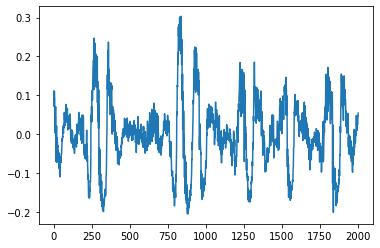

In [60]:
cycle.plot()

<AxesSubplot:>

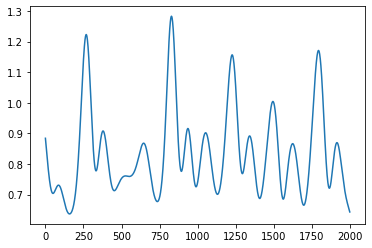

In [61]:
trend.plot()

<AxesSubplot:>

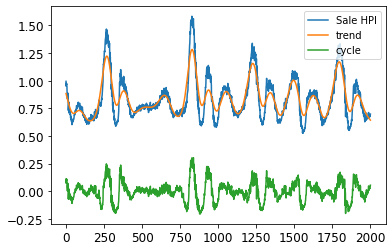

In [62]:
fig, ax = plt.subplots()

seg[['Sale HPI', 'trend', 'cycle']][:].plot(ax=ax,fontsize=12)

<AxesSubplot:>

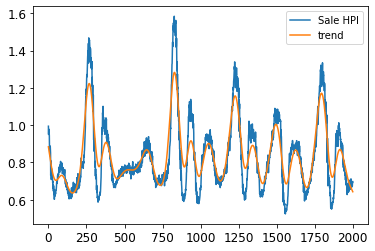

In [63]:
fig, ax = plt.subplots()
seg[['Sale HPI', 'trend']][:].plot(ax=ax,fontsize=12)

In [64]:
hpi.sort_values(by='Sale HPI', ascending=False)

,Sale HPI
827,1.5836
837,1.5613
825,1.5550
824,1.5539
826,1.5510
...,...
1562,0.5393
1559,0.5382
1560,0.5377
1554,0.5278


In [66]:
first_peak = hpi.iloc[0:500]
first_peak

,Sale HPI
0,0.9943
1,0.9502
2,0.9793
3,0.9646
4,0.9720
...,...
495,0.7594
496,0.7421
497,0.7689
498,0.7767


In [67]:
first_peak.sort_values(by='Sale HPI', ascending=False)

,Sale HPI
265,1.4676
270,1.4558
268,1.4553
269,1.4530
263,1.4382
...,...
331,0.5993
325,0.5971
329,0.5954
327,0.5882


In [68]:
third_peak = hpi.iloc[1100:1500]
third_peak

,Sale HPI
1100,0.7342
1101,0.7683
1102,0.6821
1103,0.7453
1104,0.7139
...,...
1495,1.0540
1496,1.0397
1497,1.0763
1498,1.0525


In [69]:
third_peak.sort_values(by='Sale HPI', ascending=False)

,Sale HPI
1224,1.3390
1222,1.3141
1236,1.3068
1227,1.3023
1223,1.2983
...,...
1291,0.6073
1293,0.6064
1295,0.6035
1288,0.6027


In [70]:
forth_peak = hpi.iloc[1500:2000]
forth_peak

,Sale HPI
1500,1.0313
1501,1.0846
1502,1.0808
1503,1.0674
1504,1.0328
...,...
1995,0.6792
1996,0.6753
1997,0.6742
1998,0.6933


In [71]:
forth_peak.sort_values(by='Sale HPI', ascending=False)

,Sale HPI
1801,1.3340
1790,1.3213
1792,1.3144
1798,1.3134
1793,1.3129
...,...
1555,0.5393
1559,0.5382
1560,0.5377
1554,0.5278


In [72]:
fifth_peak = hpi.iloc[1300:1600]
fifth_peak

,Sale HPI
1300,0.6633
1301,0.6550
1302,0.6657
1303,0.6683
1304,0.7122
...,...
1595,0.8806
1596,0.8578
1597,0.8713
1598,0.8793


In [73]:
fifth_peak.sort_values(by='Sale HPI', ascending=False)

,Sale HPI
1488,1.0900
1506,1.0853
1501,1.0846
1489,1.0828
1502,1.0808
...,...
1562,0.5393
1559,0.5382
1560,0.5377
1554,0.5278
